In [22]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])

circuit.t(qreg_q[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.z(qreg_q[2]).c_if(creg_c, 1)
circuit.measure(qreg_q[1], creg_c[1])
circuit.x(qreg_q[2]).c_if(creg_c, 1)

print(circuit)

          ┌───┐┌───┐ ░      ┌───┐┌─┐                 
q_0: ─|0>─┤ T ├┤ H ├─░───■──┤ H ├┤M├─────────────────
          ├───┤└───┘ ░ ┌─┴─┐└───┘└╥┘       ┌─┐       
q_1: ─|0>─┤ H ├──■───░─┤ X ├──────╫────────┤M├───────
          └───┘┌─┴─┐ ░ └───┘      ║  ┌───┐ └╥┘ ┌───┐ 
q_2: ─|0>──────┤ X ├─░────────────╫──┤ Z ├──╫──┤ X ├─
               └───┘ ░            ║  └─╥─┘  ║  └─╥─┘ 
                                  ║ ┌──╨──┐ ║ ┌──╨──┐
c: 3/═════════════════════════════╩═╡ = 1 ╞═╩═╡ = 1 ╞
                                  0 └─────┘ 1 └─────┘


In [23]:
backend = BasicAer.get_backend('qasm_simulator') # the device to run on

In [24]:
circ = circuit
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'010': 252, '001': 256, '000': 247, '011': 245}


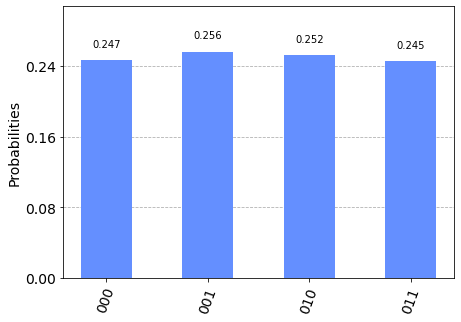

In [25]:
plot_histogram(counts)